In [4]:
import os
from tensorflow import keras
from agents.BinaryStateAgent import BinaryStateAgent
from environment.BinaryStateEnvironment import BinaryStateEnvironment
from environment.Config import ConfigTimeSeries
from environment.BaseEnvironment import TimeSeriesEnvironment
from environment.Simulator import Simulator

In [5]:
model_dir = "../aws/lstm_binary_0.5_A3Benchmark"
dataset_dir = "A3Benchmark"
pct = .5

def evaluate_model(model_dir, dataset_dir, test_pct):
    model = keras.models.load_model(model_dir)
    for subdir, dirs, files in os.walk(f"../ts_data/{dataset_dir}"):
        for file in files:
            if file.find('.csv') != -1:
                if files.index(file) < len(files)*test_pct:
                    # Trained on these files
                    pass
                else:
                    print(f"Test on file {file}")
                    config = ConfigTimeSeries()
                    env = BinaryStateEnvironment(
                        TimeSeriesEnvironment(verbose=False, filename=f"./{dataset_dir}/{file}", config=config), steps=5)

                    agent = BinaryStateAgent(dqn=model, memory=None, alpha=0.0001, gamma=0.9, epsilon=0.2, epsilon_end=0.01, epsilon_decay=0.5, fit_epoch=10, action_space=2,                                          batch_size=256)
                    simulation = Simulator(25, agent, env,2, testing=True)
                    simulation.run()

Test on file A3Benchmark-TS54.csv
Testing Score:  1706
Testing episode 0 took 59.99180316925049 seconds
Test on file A3Benchmark-TS55.csv


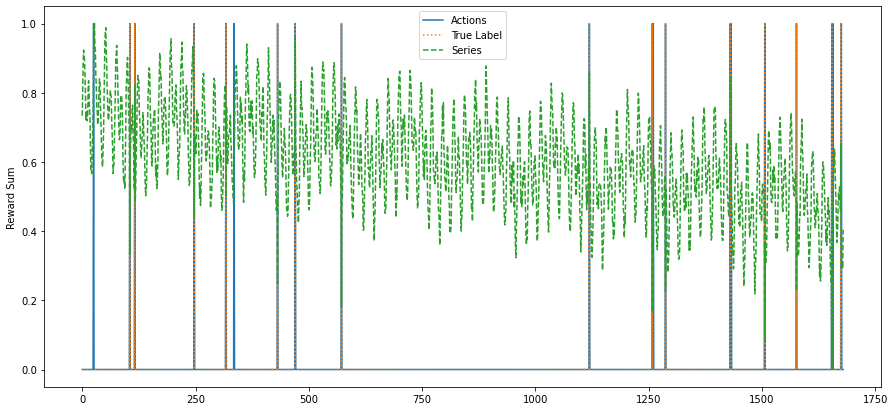

KeyboardInterrupt: 

In [6]:
evaluate_model(model_dir, dataset_dir, pct)